# install dependencies

In [1]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [2]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.05,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 9.5656296753577585, performing 49.1 it/sec
Step 100: Loss = 4.1968274719043785, performing 125.2 it/sec
Step 200: Loss = 1.4108967500364866, performing 122.5 it/sec
Step 300: Loss = 0.2946353351775395, performing 144.2 it/sec
Step 400: Loss = 0.2142687920720100, performing 149.0 it/sec
Step 500: Loss = 0.1376867515324783, performing 155.7 it/sec
Step 600: Loss = 0.0594254374597485, performing 146.0 it/sec
Step 700: Loss = 0.0102909238009367, performing 137.9 it/sec
No improvement since Step 679, early stopping.
[Best]  Step 678: Loss = 0.0092985997767685
[Final] Step 728: Loss = 0.0121533256494025

predicted end states
------------------------------------
         5th       Mean      95th
LF2E-1  6.30e-06  6.30e-06  6.30e-06
LF2E-2  9.93e-12  9.93e-12  9.93e-12
LF2E-3  6.99e-07  6.99e-07  6.99e-07
LF2E-4  1.01e-11  1.01e-11  1.01e

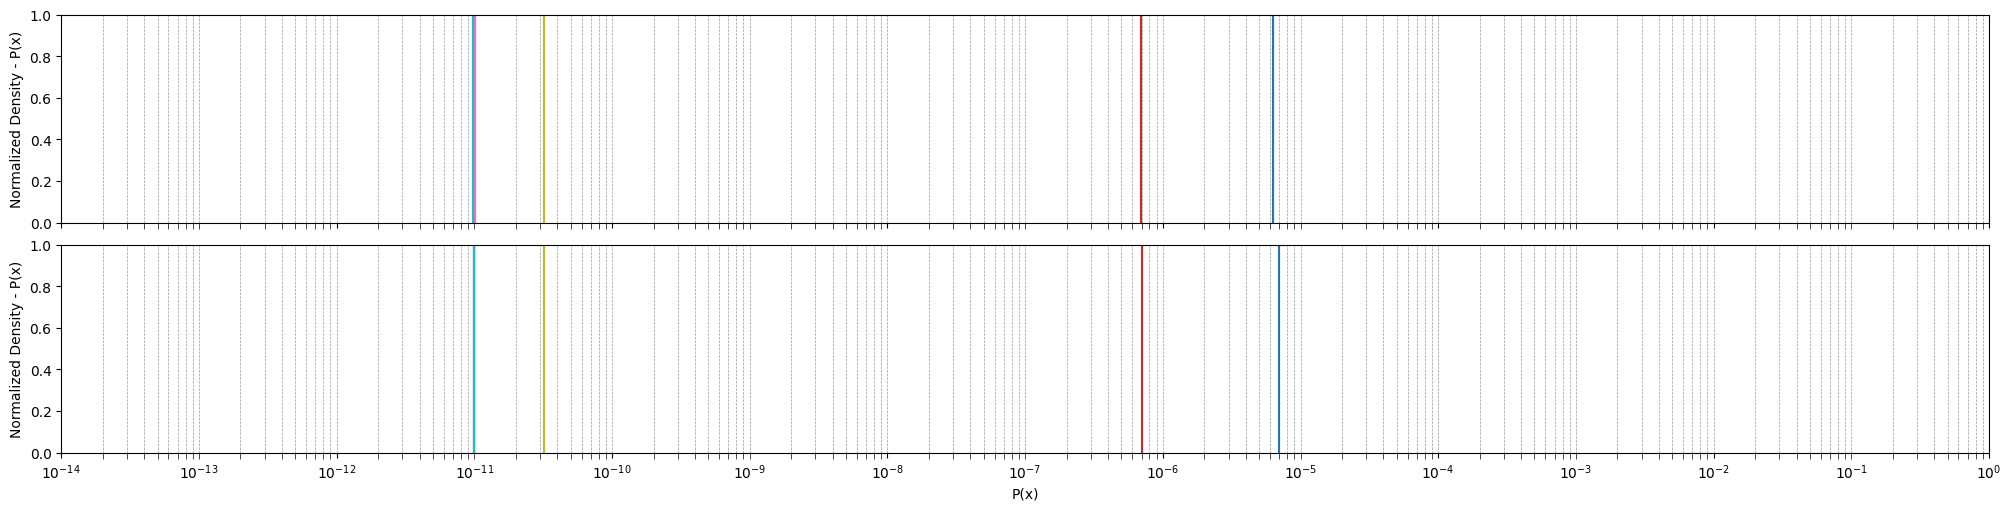

In [3]:
tunable = {
 'num_samples': 1000,      # number of monte carlo samples
 'learning_rate': 0.05,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 7e-6,  # set the initiating event (IE) frequency here
 'freeze_initiating_event': True,       # set to False if you'd like to predict the IE frequency as well
}

conditional_events = {
    'names': ['LF2E', 'FSIG', 'FROD', 'BPHR', 'DHRS', 'DHRL|DHRS', 'DHRL|~DHRS'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'LF2E-1': {
        'sequence': [1, 0, 0, 0, np.nan, np.nan, 0],
        'probability': 7e-6,
    },
    'LF2E-2': {
        'sequence': [1, 0, 0, 0, np.nan, np.nan, 1],
        'probability': 1e-11,
    },
    'LF2E-3': {
        'sequence': [1, 0, 0, 1, 0, 0, np.nan],
        'probability': 7e-7,  # frequency unknown
    },
    'LF2E-4': {
        'sequence': [1, 0, 0, 1, 0, 1, np.nan],
        'probability': 1.0e-11,
    },
    'LF2E-5': {
        'sequence': [1, 0, 0, 1, 1, np.nan, np.nan],
        'probability': 1.0e-11,
    },
    'LF2E-6': {
        'sequence': [1, 0, 1, np.nan, np.nan, np.nan, np.nan],
        'probability': 3.2e-11,
    },
    'LF2E-7': {
        'sequence': [1, 1, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 1e-11,
    },
}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)